# 3. Exploratory Data Analysis

## 3.1 Importing Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from collections import Set
from datetime import datetime



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  import sys


In [ ]:
def outlier_detect(colname, df):
    """outlier detection is based on 1.5 times the iqr. The function looks at each value an determines if
    it is a potential outlier. Make sure to create a new column caller 'outlier' in df before applying 
    this function.
    
    outlier_detect(colname, df)
    where colname is the column name and df is the dataframe you are interested in"""
    
    
    percent25=df[colname].quantile(.25)
    percent75=df[colname].quantile(.75)
    iqr=percent75 - percent25
    
    upper=percent75 + 1.5*iqr
    lower=percent25 - 1.5*iqr
    
    return lower, upper

In [ ]:
def ECDF(var):
    x=np.sort(var)
    y=np.arange(1, len(x)+1)/len(x)
    
    return x,y

In [ ]:
# function creates count and proportion for strings
def string_count(colname, df):
    """This function take a dataframe df and a column name colname where the column is a string, and creates a dataframe 
    with a count and proportion for each group of strings."""
    
    col_count=pd.DataFrame(movies_metadata[colname].value_counts())
    col_count.rename({colname:"count"}, axis=1, inplace=True)

    col_count['prop_count']=col_count['count'].apply(lambda row: row/np.sum(col_count['count']))
    return col_count

## 3.2 Importing Data

In [ ]:
movies_metadata=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/movies_metadata_cleaned.csv')
ratings=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/ratings_cleaned.csv')
keywords=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/keywords_cleaned.csv')
links=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/links_cleaned.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 3.3 Movies Metadata

### 3.3.1 Genres EDA

In [ ]:
movies_metadata.head()

,Unnamed: 0,adult,budget,genres,id,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0


In [ ]:
movies_metadata.columns

Index(['Unnamed: 0', 'adult', 'budget', 'genres', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

#### 3.3.1.2 Genres Formatting

In [ ]:
# function extracts genre
def extract_genre(row):
    """This function takes the string text in genres columns and collects the genres into a list"""
    genre=re.findall(r"'name':\s'(\w+)'",row)
    return genre

#creates a new column genres_list
movies_metadata['genres_list']=movies_metadata['genres'].apply(lambda row: extract_genre(row))

In [ ]:
# determing the possible genres
gen_coll=[]
for movie in movies_metadata['genres_list']:
    for val in movie:
        if val not in gen_coll:
            gen_coll.append(val)
gen_coll

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western']

In [ ]:
movies_metadata['genres_list'].value_counts()

In [ ]:
# percentage of movies without genre data
2652/len(movies_metadata['genres_list'])

0.058390946320841956

In [ ]:
# determining if the empty list is due to missing genre data
movies_metadata.loc[movies_metadata['genres']=='[]', ['genres', 'genres_list']]

,genres,genres_list
55,[],[]
83,[],[]
126,[],[]
137,[],[]
390,[],[]
...,...,...
45399,[],[]
45400,[],[]
45407,[],[]
45416,[],[]


Now, I need to determine the distribution of genres. There are 1783 movies that have a unique genre.

#### 3.3.1.2 Summary Statistics

In [ ]:
genre_grp=pd.DataFrame(movies_metadata['genres_list'].value_counts())
genre_grp.rename({'genres_list':'count'}, axis=1, inplace=True)
genre_grp['prop_count']=genre_grp['count'].apply(lambda row: row/np.sum(genre_grp['count']))
genre_grp

,count,prop_count
[Drama],5210,0.114712
[Comedy],3725,0.082016
[Documentary],2754,0.060637
[],2652,0.058391
"[Drama, Romance]",1342,0.029548
...,...,...
"[Fantasy, Action, Adventure, Thriller]",1,0.000022
"[Drama, Mystery, Thriller, Romance]",1,0.000022
"[Horror, Fantasy, Thriller, Mystery]",1,0.000022
"[Fantasy, Comedy, Family, Romance]",1,0.000022


In [ ]:
# summary statistics for the genre counts
genre_grp['count'].describe()

count    3154.000000
mean       14.400127
std       143.290550
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      5210.000000
Name: count, dtype: float64

In [ ]:
# determinig the number of genres with 1, 2, or 3 movies in each
genre_grp[genre_grp['count'].isin([1,2,3])].shape

(2374, 2)

In [ ]:
# number of genres with 1, 2, or 3 movies, respectively
genre_grp[genre_grp['count'].isin([1])].shape, genre_grp[genre_grp['count'].isin([2])].shape, genre_grp[genre_grp['count'].isin([3])].shape

((1783, 2), (404, 2), (187, 2))

#### 3.3.1.3 Creating Dummy Variables

In [ ]:
# function creates a column of zeros for each genre 
def dummy_var_col(genres, df):
    """This function creates a column for each of the genres
    dummy_var_col(genres, df)
    -genres: the list for new columns
    -df is the dataframe where you want to create the columns"""
    
    for genre in genres:
        df[genre]=0


In [ ]:
# creates the columns
dummy_var_col(gen_coll, movies_metadata)

# checks to see if the columns were created
movies_metadata.columns

Index(['Unnamed: 0', 'adult', 'budget', 'genres', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'genres_list', 'Animation', 'Comedy',
       'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'History', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western'],
      dtype='object')

In [ ]:
# function that fills in the values for the dummy variables
def dummy_var_value(col_name, df):
    for index, value in df.iterrows():
        for genre in value[col_name]:
            df.loc[index, genre]=1
    return df

In [ ]:
#filling in values for dummy variable
movies_metadata=dummy_var_value('genres_list', movies_metadata)

# testing
movies_metadata.loc[0]

Unnamed: 0                                                              0
adult                                                               False
budget                                                           30000000
genres                  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
id                                                                    862
imdb_id                                                         tt0114709
original_language                                                      en
original_title                                                  Toy Story
overview                Led by Woody, Andy's toys live happily in his ...
poster_path                              /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
production_companies       [{'name': 'Pixar Animation Studios', 'id': 3}]
production_countries    [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                                   1995-10-30
revenue                               

#### 3.3.1.4 dropping genres columns

In [ ]:
# dropped genres and genres_list columns
movies_metadata.drop(columns=['genres'], inplace=True)

#checking columns were removed
movies_metadata.columns

Index(['Unnamed: 0', 'adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'genres_list', 'Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western'],
      dtype='object')

#### 3.3.1.5 Saving Data

In [ ]:
movies_metadata.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/movies_metadata_cleaned.csv')

#### 3.3.1.6 Genre Summary

There are 3154 different movie genres. The interquartile range is between 1 and 3 movies; thus, the middle 50% of genres only contain 1 through 3 movies, which suggests the genres are too specific. From those different movie genres, there are 1783, 404, and 187 movies that have a genre that contains only one, two, or three movies, respectively. There are 2652 movies that lack genre data, which accounts for about 5.8% of the movies. The movies with unique value for genre will not yield reliable predictive results since there is a very limited number of them. For example, there is only one movie that is a drama, comedy, romance, family, and foreign, so that movie cannot be directly related to other films. I split each possible genre into a dummy variable. 

### 3.3.2 Production Company

#### 3.3.2.1 Formatting

In [ ]:
# looking at the values in the production_companies column
movies_metadata['production_companies'].value_counts()

[]                                                                                                                                             11858
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                                                              742
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                           540
[{'name': 'Paramount Pictures', 'id': 4}]                                                                                                        504
[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]                                                                                  439
                                                                                                                                               ...  
[{'name': 'Les Films Concordia', 'id': 1714}, {'name': 'Mosfilm', 'id': 5120}, {'name': 'Compagnia Cinemat

In [ ]:
# need to convert production_companies to strings
movies_metadata['production_companies']=movies_metadata['production_companies'].apply(lambda row: str(row))

In [ ]:
#creates a new column production_company_list

def extract_prod_company(row):
    prod=re.findall(r"'name':\s'(.+?)'",row)
    return prod
    
# extracts production company name into a list
movies_metadata['production_companies_list']=movies_metadata['production_companies'].apply(lambda row: extract_prod_company(row))

#checking the results
movies_metadata['production_companies_list']

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
45413                                                   []
45414                                        [Sine Olivia]
45415                            [American World Pictures]
45416                                          [Yermoliev]
45417                                                   []
Name: production_companies_list, Length: 45418, dtype: object

#### 3.3.2.3 Dealing with missing values

In [ ]:
# determining the number of missing values and percentage of missing values
prod_non_missing=np.sum(movies_metadata['production_companies_list'].apply(lambda row: bool(row)))

prod_missing=len(movies_metadata['production_companies_list']) - prod_non_missing

prod_missing, prod_missing/len(movies_metadata['production_companies_list'])

(11920, 0.26245101061253245)

#### 3.3.2.4 Range of values for production companies

In [ ]:
# counts for the different production companies
prod_count=pd.DataFrame(movies_metadata['production_companies_list'].value_counts())
prod_count

,production_companies_list
[],11920
[Metro-Goldwyn-Mayer (MGM)],772
[Warner Bros.],540
[Paramount Pictures],504
[Twentieth Century Fox Film Corporation],441
...,...
"[Archipel 35, Mogador Film]",1
"[Stephanie Germain Productions, Mandalay Television, Nora NL Productions]",1
"[Paramount-Orion Filmproduktion, Verona Produzione]",1
"[New Line Cinema, Silverstein / Barder Company]",1


In [ ]:
# descriptive statistics
prod_count.describe()

,production_companies_list
count,22577.000000
mean,2.011693
std,79.795465
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11920.000000


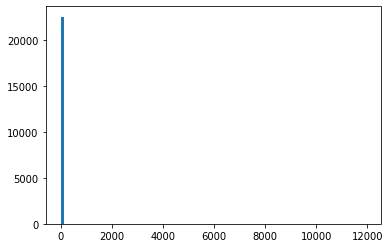

In [ ]:
plt.hist(prod_count['production_companies_list'], bins=100, histtype='bar')
plt.show()

In [ ]:
prod_count.loc[prod_count['production_companies_list']==1, 'production_companies_list'].sum(), prod_count.loc[prod_count['production_companies_list']==1, 'production_companies_list'].sum()/prod_count.shape[0]

(20233, 0.8961775258005935)

#### 3.3.2.5 Dropping production_companies

In [ ]:
movies_metadata.columns

Index(['Unnamed: 0', 'adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'genres_list', 'Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western',
       'production_companies_list'],
      dtype='object')

In [ ]:
# dropping indicated columns
movies_metadata.drop(columns=['production_companies'], inplace=True)

# makeing sure the proper columns are dropped
movies_metadata.columns

Index(['Unnamed: 0', 'adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'poster_path', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'title', 'vote_average', 'vote_count', 'genres_list', 'Animation',
       'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Mystery', 'War',
       'Foreign', 'Music', 'Documentary', 'Western',
       'production_companies_list'],
      dtype='object')

#### 3.3.2.6 Saving Data

In [ ]:
movies_metadata.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/movies_metadata_cleaned.csv')

#### 3.3.2.7 Production Companies Conclusion

There are 1192 movies missing production company, which accounts for approximately 26% of the movies. There are 22292 different production companies or combination of production companies. From those 22292 companies, the majority only have one movie in the sample because the interquartile range is 0. In fact, 19997 companies only have one movie, which is 89.7% of the movies. Thus, I dropped production companies from the dataset.

### 3.3.3 Adult, status, original_title, production_countries, run_time, and poster_path

#### 3.3.3.1 dropping status, adult and poster path

In [ ]:
# drop columns
movies_metadata.drop(columns=['adult', 'poster_path', 'status', 'original_title', 'production_countries', 'runtime'], inplace=True)

# ensuring the columns are dropped
movies_metadata.columns

Index(['Unnamed: 0', 'budget', 'id', 'imdb_id', 'original_language',
       'overview', 'release_date', 'revenue', 'spoken_languages', 'title',
       'vote_average', 'vote_count', 'genres_list', 'Animation', 'Comedy',
       'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'History', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western', 'production_companies_list'],
      dtype='object')

#### 3.3.3.2 Saving Data

In [ ]:
movies_metadata.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/movies_metadata_cleaned.csv')

### 3.3.4 Budget

#### 3.3.4.1 Descriptive Statistics

In [ ]:
movies_metadata['budget'].describe()

count    4.541800e+04
mean     4.225889e+06
std      1.743071e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

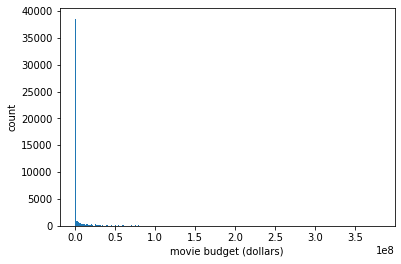

In [ ]:
# histogram for budget
bins=int(np.sqrt(len(movies_metadata['budget'])))
plt.hist(movies_metadata['budget'], bins=bins, histtype='bar')
plt.xlabel('movie budget (dollars)')
plt.ylabel('count')
plt.show()

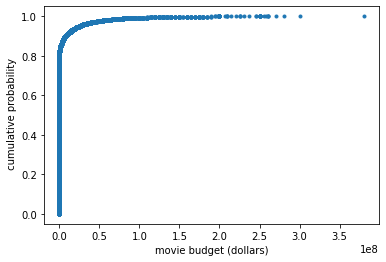

In [ ]:
# ECDF for budget

def ECDF(var):
    x=np.sort(var)
    y=np.arange(1, len(x)+1)/len(x)
    
    return x,y

x, y= ECDF(movies_metadata['budget'])

plt.plot(x, y, linestyle='none', marker='.')
plt.xlabel('movie budget (dollars)')
plt.ylabel(' cumulative probability')
plt.show()

#### 3.3.4.2 Getting Count variables for budget

In [ ]:
budget_count=pd.DataFrame(movies_metadata['budget'].value_counts())
budget_count.rename({'budget':'count'}, axis=1, inplace=True)

In [ ]:
# determining the percentage of data points in each category
budget_count['prop_count']=budget_count['count'].apply(lambda row: row/np.sum(budget_count['count']))
budget_count.head()

,count,prop_count
0,36539,0.804505
5000000,286,0.006297
10000000,258,0.005681
20000000,243,0.005350
2000000,242,0.005328


#### 3.3.4.3 Dropping Budget

In [ ]:
movies_metadata.drop(columns='budget', inplace=True)

#### 3.3.4.4 Saving Data

In [ ]:
movies_metadata.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/movies_metadata_cleaned.csv')

#### 3.3.4.5 Budget Summary

Since about 80% of budget data is zero, budget is not likely to provide useful information, so I dropped the budget column

### 3.3.5 original_language

#### 3.3.5.1 Descriptive Statistics

In [ ]:
movies_metadata['original_language'].describe()

count     45407
unique       90
top          en
freq      32239
Name: original_language, dtype: object

#### 3.3.5.2 Value counts

In [ ]:
# creating counts for each language
language_count=pd.DataFrame(movies_metadata['original_language'].value_counts())
language_count.rename({'original_language':"count"}, axis=1, inplace=True)

language_count['prop_count']=language_count['count'].apply(lambda row: row/np.sum(language_count['count']))
language_count.head()

,count,prop_count
en,32239,0.710001
fr,2435,0.053626
it,1529,0.033673
ja,1346,0.029643
de,1079,0.023763


In [ ]:
# descriptive statistics for the counts
language_count['count'].describe()

count       90.000000
mean       504.522222
std       3403.055257
min          1.000000
25%          2.000000
50%         11.000000
75%         94.500000
max      32239.000000
Name: count, dtype: float64

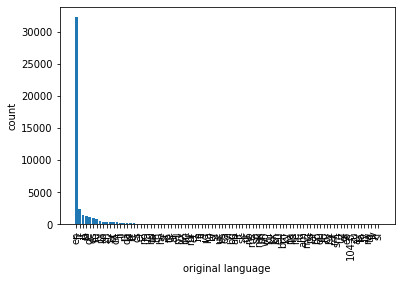

In [ ]:
# bar plot for the number of movies with each original language
fig, ax = plt.subplots()

ax.bar(language_count.index, height=language_count['count'])
ax.set_xticklabels(language_count.index, rotation=90)
ax.set_xlabel('original language')
ax.set_ylabel('count')
plt.show()

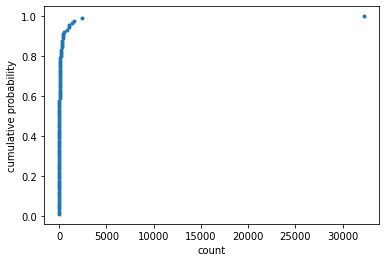

In [ ]:
# plotting ECDF for the counts
x, y= ECDF(language_count['count'])

plt.plot(x, y, linestyle='none', marker='.')
plt.xlabel('count')
plt.ylabel('cumulative probability')
plt.show()

In [ ]:
language_count.loc[language_count['count']<10, 'count'].sum()

111

#### 3.3.5.3 Creating other language category

In [ ]:
# collecting languages that are used in less than 10 movies
other_language=language_count[language_count['count']<10].index
other_language

Index(['lt', 'sk', 'ur', 'nb', 'ms', 'sq', 'mk', 'sh', 'wo', 'ku', 'kk', 'kn',
       'eu', 'bm', 'ky', 'pa', 'lo', 'ne', 'iu', 'am', 'mn', 'ps', 'af', 'bo',
       'qu', 'lb', 'cy', 'hy', 'mt', 'sm', 'uz', 'gl', 'eo', '104.0', 'zu',
       'ay', 'la', 'fy', 'rw', 'tg', 'jv', 'si'],
      dtype='object')

In [ ]:
# create a dictionary to replace them with 'other'

other_dict={}

for lan in other_language:
    other_dict[lan]='other'
    
other_dict

{'104.0': 'other',
 'af': 'other',
 'am': 'other',
 'ay': 'other',
 'bm': 'other',
 'bo': 'other',
 'cy': 'other',
 'eo': 'other',
 'eu': 'other',
 'fy': 'other',
 'gl': 'other',
 'hy': 'other',
 'iu': 'other',
 'jv': 'other',
 'kk': 'other',
 'kn': 'other',
 'ku': 'other',
 'ky': 'other',
 'la': 'other',
 'lb': 'other',
 'lo': 'other',
 'lt': 'other',
 'mk': 'other',
 'mn': 'other',
 'ms': 'other',
 'mt': 'other',
 'nb': 'other',
 'ne': 'other',
 'pa': 'other',
 'ps': 'other',
 'qu': 'other',
 'rw': 'other',
 'sh': 'other',
 'si': 'other',
 'sk': 'other',
 'sm': 'other',
 'sq': 'other',
 'tg': 'other',
 'ur': 'other',
 'uz': 'other',
 'wo': 'other',
 'zu': 'other'}

In [ ]:
# replace the selected languages with other
movies_metadata['original_language'].replace(other_dict, inplace=True)

# testing
len(movies_metadata.loc[movies_metadata['original_language']=='other', 'original_language'])

111

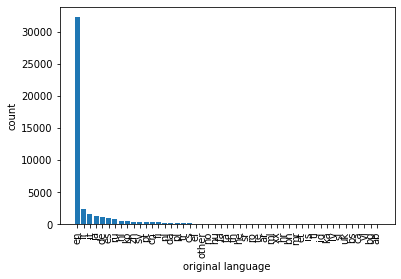

In [ ]:
# replotting the bar graph

# creating counts for each language
language_count=pd.DataFrame(movies_metadata['original_language'].value_counts())
language_count.rename({'original_language':"count"}, axis=1, inplace=True)

language_count['prop_count']=language_count['count'].apply(lambda row: row/np.sum(language_count['count']))
language_count.head()

# bar plot for the number of movies with each original language
fig, ax = plt.subplots()

ax.bar(language_count.index, height=language_count['count'])
ax.set_xticklabels(language_count.index, rotation=90)
ax.set_xlabel('original language')
ax.set_ylabel('count')
plt.show()

#### 3.3.5.4 Saving Data

In [ ]:
movies_metadata.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/movies_metadata_cleaned.csv')

#### 3.3.5.5 Original Language Summary

Approximately 71% of the movies were originally created in English. The second most common language is French with 5%. There are 111 languages that have less than 10 movies, which were replaced with 'other'. Since languages are skewed to only a few, I will not be using languages in my analysis.

### 3.3.6 Spoken Languages

#### 3.3.6.1 Spoken Language Formatting

In [ ]:
# make sure spoken language is a string
movies_metadata['spoken_languages']=movies_metadata['spoken_languages'].astype(str)

#### 3.3.6.2 Extracting data

In [ ]:
# function that collects the spoken languages
def extract_language(row):
    lang=re.findall(r"'iso_639_1':\s'(\w+)", row)
    return lang


In [ ]:
# extracting the spoken languages
movies_metadata['spoken_languages_list']=movies_metadata['spoken_languages'].apply(lambda row: extract_language(row))

#### 3.3.6.3 Descriptive Statistics

In [ ]:
movies_metadata['spoken_languages_list'].value_counts()

In [ ]:
spoken_language_count=string_count('spoken_languages_list', movies_metadata)

spoken_language_count

,count,prop_count
[en],22379,0.492734
[],3824,0.084196
[fr],1850,0.040733
[ja],1286,0.028315
[it],1218,0.026818
...,...,...
"[en, et, fr]",1,0.000022
"[de, fi, fr, ru, en]",1,0.000022
"[bs, en, it]",1,0.000022
"[en, ta, te]",1,0.000022


#### 3.3.6.3 Descriptive Statistics

In [ ]:
spoken_language_count['count'].describe()

count     1931.000000
mean        23.520456
std        521.762337
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      22379.000000
Name: count, dtype: float64

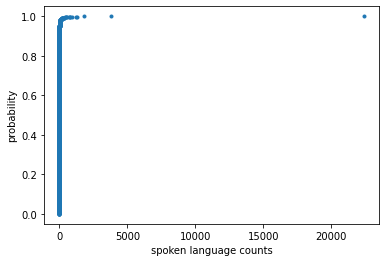

In [ ]:
# ECDF for spoken languages count
x,y=ECDF(spoken_language_count['count'])

plt.plot(x, y, linestyle='none', marker='.')
plt.xlabel('spoken language counts')
plt.ylabel('probability')
plt.show()

#### 3.3.6.4 Saving Data

In [ ]:
movies_metadata.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/movies_metadata_cleaned.csv')

#### 3.3.6.5 spoken language summary

English is the most spoken language in the set because it is the only language spoken in 49% of the movies. Approximately 8% of the movies is missing spoken language data. French is the second most spoken language at 4% of movies speaking French. From the ECDF, it appears that the majority of languages are only spoken in one movie, which is further supported because the IQR for the language counts is 1 with a mean of 1 and a minimum of 1. Thus, the middle 50% of languages are only spoken in 1 or 2 movies. Due to the highly skewed data, spoken languages will likely not provide useful information in detecting similarities between movies.

### 3.3.7 id, imdb_id, and title

id, imdb_id, and title will not be used in analysis since these items are unique for each row; however, I will keep the data in the table for now in case I need the information. Also, id will be used to merge the movies_metadata with the links and credits databases

### 3.3.8 overview

In [ ]:
movies_metadata.head(3)

,Unnamed: 0,id,imdb_id,original_language,overview,release_date,revenue,spoken_languages,title,vote_average,...,Horror,History,Mystery,War,Foreign,Music,Documentary,Western,production_companies_list,spoken_languages_list
0,0,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,...,0,0,0,0,0,0,0,0,[Pixar Animation Studios],[en]
1,1,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,...,0,0,0,0,0,0,0,0,"[TriStar Pictures, Teitler Film, Interscope Co...","[en, fr]"
2,2,15602,tt0113228,en,A family wedding reignites the ancient feud be...,1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,...,0,0,0,0,0,0,0,0,"[Warner Bros., Lancaster Gate]",[en]


Overview contains a string of information that provides an overview of the movie. This data will not be used in this model; however, NLP techniques could be utilized on it at a later time

In [ ]:
movies_metadata.columns

Index(['Unnamed: 0', 'id', 'imdb_id', 'original_language', 'overview',
       'release_date', 'revenue', 'spoken_languages', 'title', 'vote_average',
       'vote_count', 'genres_list', 'Animation', 'Comedy', 'Family',
       'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'History', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western', 'production_companies_list',
       'spoken_languages_list'],
      dtype='object')

### 3.3.9 Release_date

#### 3.3.10.1 Release Date Formatting

In [ ]:
#checking data types
movies_metadata.dtypes

Unnamed: 0                     int64
id                            object
imdb_id                       object
original_language             object
overview                      object
release_date                  object
revenue                      float64
spoken_languages              object
title                         object
vote_average                 float64
vote_count                   float64
genres_list                   object
Animation                      int64
Comedy                         int64
Family                         int64
Adventure                      int64
Fantasy                        int64
Romance                        int64
Drama                          int64
Action                         int64
Crime                          int64
Thriller                       int64
Horror                         int64
History                        int64
Mystery                        int64
War                            int64
Foreign                        int64
M

In [ ]:
# checkin for missing values
movies_metadata.isna().any()

Unnamed: 0                   False
id                           False
imdb_id                       True
original_language             True
overview                      True
release_date                  True
revenue                       True
spoken_languages             False
title                         True
vote_average                  True
vote_count                    True
genres_list                  False
Animation                    False
Comedy                       False
Family                       False
Adventure                    False
Fantasy                      False
Romance                      False
Drama                        False
Action                       False
Crime                        False
Thriller                     False
Horror                       False
History                      False
Mystery                      False
War                          False
Foreign                      False
Music                        False
Documentary         

In [ ]:
# determining date time format
movies_metadata['release_date'][:10]

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
5    1995-12-15
6    1995-12-15
7    1995-12-22
8    1995-12-22
9    1995-11-16
Name: release_date, dtype: object

In [ ]:
# ensure release date is a string
movies_metadata['release_date']=movies_metadata['release_date'].astype(str)

# replace 'nan' with 1776-07-04
movies_metadata['release_date']=movies_metadata['release_date'].replace('nan', '1776-07-04')

In [ ]:
# convert the string into a datetime
movies_metadata['release_date']=movies_metadata['release_date'].apply(lambda row: datetime.strptime(row, '%Y-%m-%d'))

In [ ]:
# checking to make sure it worked
movies_metadata.dtypes

Unnamed: 0                            int64
id                                   object
imdb_id                              object
original_language                    object
overview                             object
release_date                 datetime64[ns]
revenue                             float64
spoken_languages                     object
title                                object
vote_average                        float64
vote_count                          float64
genres_list                          object
Animation                             int64
Comedy                                int64
Family                                int64
Adventure                             int64
Fantasy                               int64
Romance                               int64
Drama                                 int64
Action                                int64
Crime                                 int64
Thriller                              int64
Horror                          

#### 3.3.10.2 Release Date Descriptive Statistics

In [ ]:
movies_metadata['release_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   45418
unique                  17334
top       2008-01-01 00:00:00
freq                      136
first     1776-07-04 00:00:00
last      2020-12-16 00:00:00
Name: release_date, dtype: object

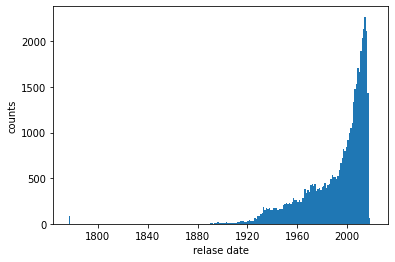

In [ ]:
# plotting a historgram of the dates
bins=int(np.sqrt(len(movies_metadata['release_date'])))
plt.hist(movies_metadata['release_date'], bins=bins, histtype='bar')
plt.xlabel('relase date')
plt.ylabel('counts')
plt.show()

In [ ]:
# getting counts for the release dates
release_date_count=string_count('release_date', movies_metadata)

release_date_count.reset_index(inplace=True)
release_date_count.rename({'index':'date'}, axis=1, inplace=True)
release_date_count.sort_values('date')

,date,count,prop_count
7,1776-07-04,85,0.001872
11712,1874-12-09,1,0.000022
11709,1878-06-14,1,0.000022
10720,1883-11-19,1,0.000022
11707,1887-08-18,1,0.000022
...,...,...,...
10309,2018-04-04,1,0.000022
10221,2018-04-25,1,0.000022
11494,2018-11-07,1,0.000022
9673,2018-12-31,1,0.000022


#### 3.3.10.3 Replacing incorrect values

In [ ]:
# function replace any date that occurs after 1888-10-14 with 1776-07-04
def replace_date(row):
    if row < datetime.strptime('1888-10-14', '%Y-%m-%d'):
        row=datetime.strptime('1776-07-04', '%Y-%m-%d')
    return row

In [ ]:
# replace incorrect dates
movies_metadata['release_date']=movies_metadata['release_date'].apply(lambda row: replace_date(row))

In [ ]:
# verifying dates are replaced
release_date_count=string_count('release_date', movies_metadata)

release_date_count.reset_index(inplace=True)
release_date_count.rename({'index':'date'}, axis=1, inplace=True)
release_date_count.sort_values('date')

,date,count,prop_count
6,1776-07-04,90,0.001982
10966,1888-10-15,1,0.000022
10967,1890-01-01,1,0.000022
8985,1890-03-09,1,0.000022
3503,1890-11-21,3,0.000066
...,...,...,...
10113,2018-04-04,1,0.000022
12163,2018-04-25,1,0.000022
11900,2018-11-07,1,0.000022
11397,2018-12-31,1,0.000022


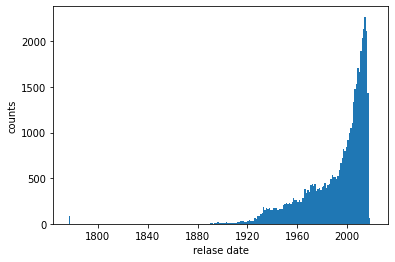

In [ ]:
# plotting a historgram of the dates
bins=int(np.sqrt(len(movies_metadata['release_date'])))
plt.hist(movies_metadata['release_date'], bins=bins, histtype='bar')
plt.xlabel('relase date')
plt.ylabel('counts')
plt.show()

#### 3.3.10.3 Investigating the release dates by year

In [ ]:
# extracts year from release date
movies_metadata['release_year']=movies_metadata['release_date'].apply(lambda row: row.year)

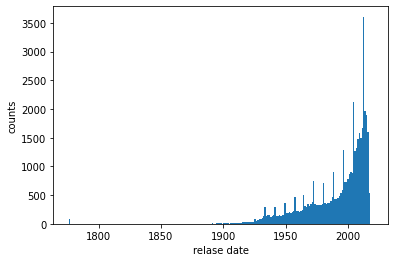

In [ ]:
# plotting a historgram for release year
bins=int(np.sqrt(len(movies_metadata['release_year'])))
plt.hist(movies_metadata['release_year'], bins=bins, histtype='bar')
plt.xlabel('relase date')
plt.ylabel('counts')
plt.show()

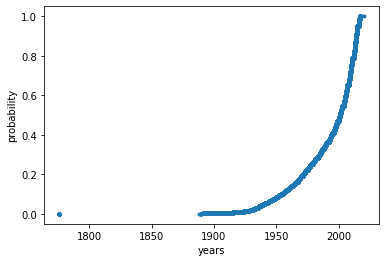

In [ ]:
# graphing ECDF for release year
x, y=ECDF(movies_metadata['release_year'])

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('years')
plt.ylabel('probability')
plt.show()

In [ ]:
# descriptive statistics
movies_metadata['release_year'].describe()

count    45418.000000
mean      1991.464375
std         25.853491
min       1776.000000
25%       1978.000000
50%       2001.000000
75%       2010.000000
max       2020.000000
Name: release_year, dtype: float64

##### 3.3.10.4 Saving Data

In [ ]:
movies_metadata.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/movies_metadata_cleaned.csv')

#### 3.3.10.5 release date summary

The dates are left skewed, with the majorities occurs in the 2000' and on. Those movies with the date of 1776-07-04 are missing values. Since the first film was recorded on 1888-10-14, all of the dates prior to this are likely a mistake, so those dates will be reset to 1776-07-04. The median release year is 2001 with an IQR of 32 years, so the bulk of the movies are release between 1978 and 2010.

### 3.3.10 Average Vote Count

In [ ]:
movies_metadata=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/movies_metadata_cleaned.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### 3.3.11.1 formatting

In [ ]:
# Looking at the range of possible values
movies_metadata['vote_average'].unique()

array([ 7.7,  6.9,  6.5,  6.1,  5.7,  6.2,  5.4,  5.5,  6.6,  7.1,  7.8,
        7.2,  6.4,  6. ,  6.3,  7. ,  7.4,  7.6,  6.8,  7.3,  3.5,  6.7,
        8.1,  5.9,  5.2,  3. ,  5.8,  4.5,  4.4,  2.8,  4.1,  5.1,  3.9,
        7.5,  0. ,  7.9,  5.6,  3.3,  5.3,  4.3,  3.8,  5. ,  4. , 10. ,
        4.9,  4.6,  4.7,  2.5,  4.8,  8.2,  8.3,  8.5,  8. ,  2. ,  3.4,
        3.7,  4.2,  3.6,  2.7,  3.2,  2.9,  9. ,  9.3,  8.8,  8.7,  1.5,
        1.7,  3.1,  1. ,  8.4,  2.4,  8.6,  8.9,  1.2,  1.6,  2.3,  1.3,
        1.9,  0.5,  2.1,  2.6,  9.1,  1.8,  9.5,  9.2,  9.6,  2.2,  1.4,
        9.8,  9.4,  0.7,  1.1])

In [ ]:
# replacing nan with 0
movies_metadata['vote_average']=movies_metadata['vote_average'].fillna(0)

#verifying it worked
movies_metadata['vote_average'].isna().any()

False

#### 3.3.11.2 Descriptive Statistics

In [ ]:
movies_metadata['vote_average'].describe()

count    45418.000000
mean         5.618369
std          1.923848
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

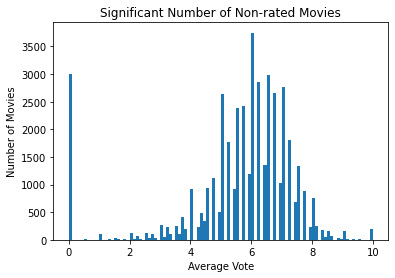

In [ ]:
# bar graph for average vote count
plt.hist(movies_metadata['vote_average'], bins=100, histtype='bar')
plt.title('Significant Number of Non-rated Movies')
plt.xlabel('Average Vote')
plt.ylabel('Number of Movies')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


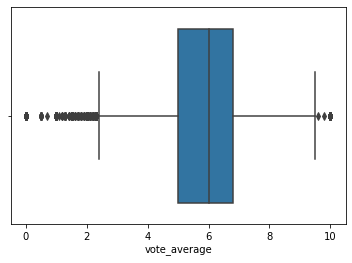

In [ ]:
# boxplot
sns.boxplot(movies_metadata['vote_average'])
plt.title('')
plt.show()

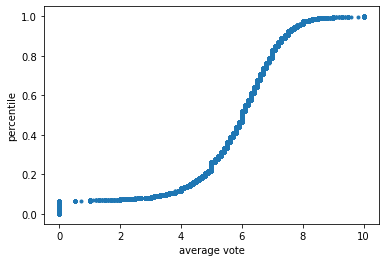

In [ ]:
#ECDF for average vote
x, y =ECDF(movies_metadata['vote_average'])

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('average vote')
plt.ylabel('percentile')
plt.show()

In [ ]:
string_count('vote_average', movies_metadata)

,count,prop_count
0.0,2993,0.065899
6.0,2467,0.054318
5.0,1996,0.043947
7.0,1884,0.041481
6.5,1721,0.037892
...,...,...
9.4,3,0.000066
9.6,1,0.000022
9.8,1,0.000022
0.7,1,0.000022


#### 3.3.11.3 Outlier Detection

In [ ]:
# determing the upper and lower limits for possible outliers
lower, upper = outlier_detect('vote_average', movies_metadata)

print('The lower limit for outlier detection is {} while the upper limit is {}'.format(round(lower, 1), round(upper, 1)))

The lower limit for outlier detection is 2.3 while the upper limit is 9.5


In [ ]:
# creating an outlier column
outlier=movies_metadata
outlier['outlier']=movies_metadata['vote_average'].apply(lambda row: 'outlier' if (row < lower or row > upper) else 'non-outlier')

In [ ]:
outlier.loc[outlier['vote_average']<lower,['vote_average', 'outlier']].sort_values('vote_average', ascending=False)

,vote_average,outlier
37593,2.3,outlier
43000,2.3,outlier
18166,2.3,outlier
7768,2.3,outlier
43503,2.3,outlier
...,...,...
26146,0.0,outlier
26149,0.0,outlier
26152,0.0,outlier
26178,0.0,outlier


In [ ]:
outlier.loc[outlier['vote_average']>upper,['vote_average', 'outlier']].sort_values('vote_average', ascending=False)

,vote_average,outlier
186,10.0,outlier
37838,10.0,outlier
37080,10.0,outlier
37291,10.0,outlier
37296,10.0,outlier
...,...,...
25661,10.0,outlier
25720,10.0,outlier
45323,10.0,outlier
20381,9.8,outlier


In [ ]:
# Looking at the counts for outlier vs non-outliers
string_count('outlier', outlier)

,count,prop_count
non-outlier,41821,0.920802
outlier,3597,0.079198


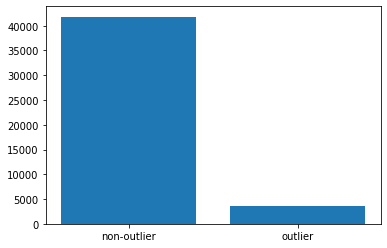

In [ ]:
# bar graph of non-oultiers vs outlier counts
plt.bar(string_count('outlier', outlier).index, height=string_count('outlier', outlier)['count'])
plt.show()

#### 3.3.11.4 Vote Average Summary

The average vote average is 5.6 while the median is 6. The data is slightly left skewed likely due to the 2,993 missing values, which are encoded as 0. The IQR is 1.8, which suggests the data is mostly centered, and the majority of data ranges between a rating of 5 and 6.8. There are 3,597 potential outliers that are less than 2.3 or larger than 9.5.

### 3.3.11 Revenue

#### 3.3.12.1 Format

In [ ]:
movies_metadata['revenue'].unique()

array([3.73554033e+08, 2.62797249e+08, 0.00000000e+00, ...,
       1.32861200e+06, 1.26879300e+06, 1.41300000e+06])

In [ ]:
# checking for missing values
movies_metadata['revenue'].isna().sum()

4

#### 3.3.12.2 Descriptive Statistics

In [ ]:
movies_metadata['revenue'].describe()

count    4.541400e+04
mean     1.121683e+07
std      6.436312e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

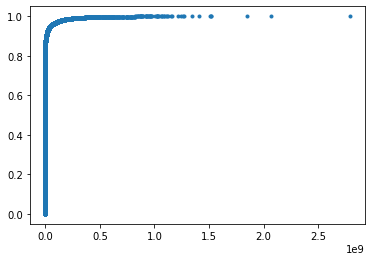

In [ ]:
#plotting ecdf
x, y =ECDF(movies_metadata['revenue'])

plt.plot(x, y, marker='.', linestyle='none')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


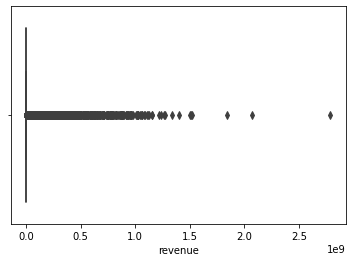

In [ ]:
sns.boxplot(movies_metadata['revenue'])
plt.show()

#### 3.3.12.3 Dropping revenue Data

In [ ]:
movies_metadata.drop(columns='revenue', inplace=True)
movies_metadata.head(3)

,Unnamed: 0,id,imdb_id,original_language,overview,release_date,spoken_languages,title,vote_average,vote_count,...,Mystery,War,Foreign,Music,Documentary,Western,production_companies_list,spoken_languages_list,release_year,outlier
0,0,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,...,0,0,0,0,0,0,[Pixar Animation Studios],[en],1995,non-outlier
1,1,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,1995-12-15,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,...,0,0,0,0,0,0,"[TriStar Pictures, Teitler Film, Interscope Co...","[en, fr]",1995,non-outlier
2,2,15602,tt0113228,en,A family wedding reignites the ancient feud be...,1995-12-22,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,...,0,0,0,0,0,0,"[Warner Bros., Lancaster Gate]",[en],1995,non-outlier


#### 3.3.12.4 Revenue Summary

Since at least 75% of revenue data is zeros, the data is droped.

### 3.3.12 Vote Count

#### 3.3.13.1 Descriptive Statistics

In [ ]:
movies_metadata['vote_count'].describe()

count    45414.000000
mean       109.971837
std        491.549122
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

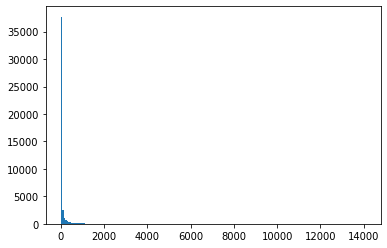

In [ ]:
# histogram
plt.hist(movies_metadata['vote_count'], bins=int(np.sqrt(len(movies_metadata['vote_count']))))
plt.show()

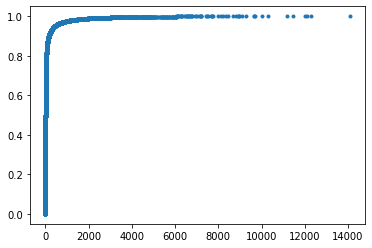

In [ ]:
# ECDF
x,y = ECDF(movies_metadata['vote_count'])
plt.plot(x, y, marker='.', linestyle='none')
plt.show()

In [ ]:
string_count('vote_count', movies_metadata)

,count,prop_count
1.0,3260,0.071784
2.0,3131,0.068943
0.0,2890,0.063637
3.0,2780,0.061215
4.0,2479,0.054587
...,...,...
2755.0,1,0.000022
1187.0,1,0.000022
4200.0,1,0.000022
3322.0,1,0.000022


#### 3.3.13.2 vote count summary

Vote count data is heavily rightly skewed where 75% of movies have only 34 or less votes, and the max movie has 14075. Approximately 6% of movies have 0 votes. 

### 3.3.13 Pairwise comparisons

In [ ]:
movies_metadata.head(3)

,Unnamed: 0,id,imdb_id,original_language,overview,release_date,spoken_languages,title,vote_average,vote_count,...,Mystery,War,Foreign,Music,Documentary,Western,production_companies_list,spoken_languages_list,release_year,outlier
0,0,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,...,0,0,0,0,0,0,[Pixar Animation Studios],[en],1995,non-outlier
1,1,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,1995-12-15,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,...,0,0,0,0,0,0,"[TriStar Pictures, Teitler Film, Interscope Co...","[en, fr]",1995,non-outlier
2,2,15602,tt0113228,en,A family wedding reignites the ancient feud be...,1995-12-22,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,...,0,0,0,0,0,0,"[Warner Bros., Lancaster Gate]",[en],1995,non-outlier


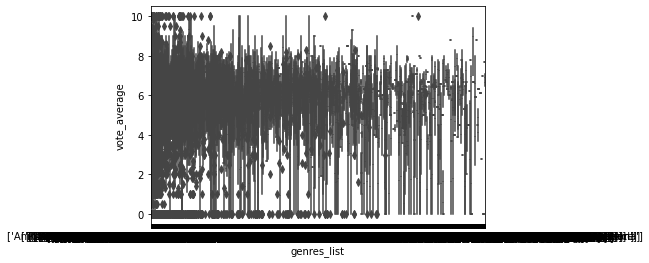

In [ ]:
sns.boxplot(x=movies_metadata['genres_list'].apply(lambda row: str(row)), y=movies_metadata['vote_average'])
plt.show()

There are only two numerical variables (vote_counts and vote average) while the remaining variables are categorical. There are two many categories to visualize for the variables

### 3.3.14 Data Structure

In [ ]:
movies_metadata.shape

(45418, 33)

In [ ]:
movies_metadata.head()

,Unnamed: 0,id,imdb_id,original_language,overview,release_date,spoken_languages,title,vote_average,vote_count,...,Mystery,War,Foreign,Music,Documentary,Western,production_companies_list,spoken_languages_list,release_year,outlier
0,0,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,...,0,0,0,0,0,0,[Pixar Animation Studios],[en],1995,non-outlier
1,1,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,1995-12-15,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,...,0,0,0,0,0,0,"[TriStar Pictures, Teitler Film, Interscope Co...","[en, fr]",1995,non-outlier
2,2,15602,tt0113228,en,A family wedding reignites the ancient feud be...,1995-12-22,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,...,0,0,0,0,0,0,"[Warner Bros., Lancaster Gate]",[en],1995,non-outlier
3,3,31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,...,0,0,0,0,0,0,[Twentieth Century Fox Film Corporation],[en],1995,non-outlier
4,4,11862,tt0113041,en,Just when George Banks has recovered from his ...,1995-02-10,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,...,0,0,0,0,0,0,"[Sandollar Productions, Touchstone Pictures]",[en],1995,non-outlier


In [ ]:
movies_metadata.columns

Index(['Unnamed: 0', 'id', 'imdb_id', 'original_language', 'overview',
       'release_date', 'spoken_languages', 'title', 'vote_average',
       'vote_count', 'genres_list', 'Animation', 'Comedy', 'Family',
       'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'History', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western', 'production_companies_list',
       'spoken_languages_list', 'release_year', 'outlier'],
      dtype='object')

## 3.4 Ratings

In [ ]:
ratings=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/ratings_cleaned.csv')

### 3.4.1 Descriptive Statistics

In [ ]:
ratings.shape

(26024289, 5)

In [ ]:
ratings.head()

,Unnamed: 0,Unnamed: 0.1,userId,movieId,rating
0,0,0,1,110,1.0
1,1,1,1,147,4.5
2,2,2,1,858,5.0
3,3,3,1,1221,5.0
4,4,4,1,1246,5.0


In [ ]:
ratings['rating'].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

The mean and median are very close and the IQR and standard deviation are very similiar, which suggests the data is symmetric. 

### 3.4.2 User Ratings 

#### 3.4.2.1 Median vote rating by user

In [ ]:
ratings.head()

,Unnamed: 0,Unnamed: 0.1,userId,movieId,rating
0,0,0,1,110,1.0
1,1,1,1,147,4.5
2,2,2,1,858,5.0
3,3,3,1,1221,5.0
4,4,4,1,1246,5.0


In [ ]:
# calculating the median rating for each user
median_rating_user=ratings.groupby('userId')['rating'].median()
median_rating_user.shape

(270896,)

In [ ]:
# sorting median ratings by largest to smallest
median_rating_user.sort_values(ascending=False)

userId
1         5.0
223763    5.0
223704    5.0
139667    5.0
223721    5.0
         ... 
104573    0.5
205453    0.5
16897     0.5
155073    0.5
85414     0.5
Name: rating, Length: 270896, dtype: float64

In [ ]:
# distribution of user median ratings
median_rating_user.describe()

count    270896.000000
mean          3.719962
std           0.696887
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

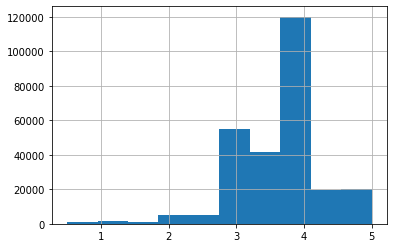

In [ ]:
# historgram of user's median vote rating
median_rating_user.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


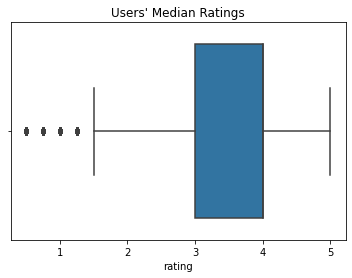

In [ ]:
# boxplot of median votes by users
sns.boxplot(median_rating_user)
plt.title("Users' Median Ratings")
plt.show()

#### 3.4.2.2 Number of Movies Rated

In [ ]:
# calculating the number of movies rated by each user
number_rated_movies=ratings.groupby('userId')['rating'].count()
number_rated_movies.sort_values(ascending=False)

userId
45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
          ...  
30155         1
9641          1
164717        1
243426        1
234625        1
Name: rating, Length: 270896, dtype: int64

In [ ]:
# distribution of vote counts
number_rated_movies.describe()

count    270896.000000
mean         96.067454
std         205.719606
min           1.000000
25%          15.000000
50%          30.000000
75%          93.000000
max       18276.000000
Name: rating, dtype: float64

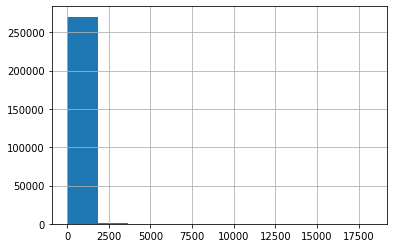

In [ ]:
# historgram for number of movies rated by each user
number_rated_movies.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


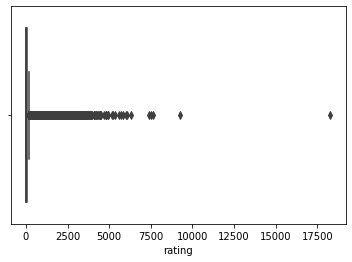

In [ ]:
# boxplot of number of movies rated per user
sns.boxplot(number_rated_movies)
plt.show()

#### 3.4.2.3 User Outliers


In [ ]:
median_rating_user.head()

userId
1    5.0
2    3.5
3    3.0
4    4.0
5    5.0
Name: rating, dtype: float64

In [ ]:
# turning median vote by user into a data frame
median_rating_user_df=pd.DataFrame(median_rating_user.values,index=median_rating_user.index, columns=['median_vote'])
median_rating_user_df.shape

(270896, 1)

In [ ]:
median_rating_user_df.head()

,median_vote
userId,
1,5.0
2,3.5
3,3.0
4,4.0
5,5.0


In [ ]:
# getting the lower and upper bound for outlier detection
lower, upper=outlier_detect('median_vote', median_rating_user_df)

In [ ]:
# creating an outlier column
outlier=median_rating_user_df
outlier['outlier']=median_rating_user_df['median_vote'].apply(lambda row: 'outlier' if (row < lower or row > upper) else 'non-outlier')

In [ ]:
# checking size of outlier
outlier.shape

(270896, 2)

In [ ]:
# looking at first few rows
outlier.head()

,median_vote,outlier
userId,,
1,5.0,non-outlier
2,3.5,non-outlier
3,3.0,non-outlier
4,4.0,non-outlier
5,5.0,non-outlier


In [ ]:
# number of potential outliers
outlier.groupby('outlier')['median_vote'].count()

outlier
non-outlier    268628
outlier          2268
Name: median_vote, dtype: int64

To investigate the potential outlier, I will merge the outlier data set with the vote count data. First, I will turn the vote count data into a data frame. Then I will merge outlier and vote count data frames. Finally, I will create a scatter plot between number of movies rated and the median rating while coloring each point based on if it is a potential outlier or not.

In [ ]:
#turning number of rated movies into a data frame
number_rated_movies_df=pd.DataFrame(number_rated_movies.values, index=number_rated_movies.index, columns=['vote_count'])
number_rated_movies_df.sort_values('vote_count',ascending=False).head()

,vote_count
userId,
45811,18276
8659,9279
270123,7638
179792,7515
228291,7410


In [ ]:
# number of users 
number_rated_movies_df.shape

(270896, 1)

In [ ]:
# merge outlier with number of movies rated
user_outlier=outlier.merge(number_rated_movies_df, how='left', left_index=True, right_index=True)
user_outlier.head()

,median_vote,outlier,vote_count
userId,,,
1,5.0,non-outlier,27
2,3.5,non-outlier,22
3,3.0,non-outlier,10
4,4.0,non-outlier,62
5,5.0,non-outlier,26


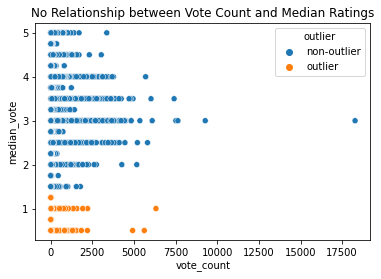

In [ ]:
# scatter plot
sns.scatterplot(x=user_outlier.vote_count, y=user_outlier.median_vote, hue=user_outlier.outlier )
plt.title('No Relationship between Vote Count and Median Ratings')
plt.show()

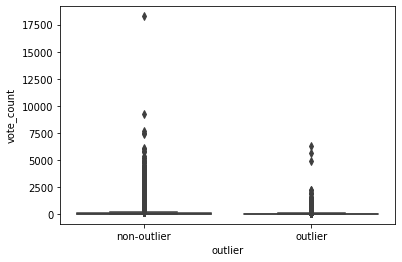

In [ ]:
# boxplot of vote count
sns.boxplot(x=user_outlier.outlier, y=user_outlier.vote_count)
plt.show()

### 3.4.3 Movie Ratings

#### 3.4.3.1 Number of users who rated each movies

In [ ]:
# number of users who rated each movie
movie_ratings=ratings.groupby('movieId')['userId'].count()
movie_ratings.shape

(45115,)

In [ ]:
# creating a data frame
movie_ratings_df=pd.DataFrame(movie_ratings.values, index=movie_ratings.index, columns=['number_of_users'])
movie_ratings_df.head()

,number_of_users
movieId,
1,66008
2,26060
3,15497
4,2981
5,15258


In [ ]:
# sorting by number of user from largest to smallest
movie_ratings_df.sort_values(by='number_of_users', ascending=False)

,number_of_users
movieId,
356,91921
318,91082
296,87901
593,84078
2571,77960
...,...
151575,1
151581,1
113014,1


In [ ]:
movie_ratings_df.head()

,number_of_users
movieId,
1,66008
2,26060
3,15497
4,2981
5,15258


In [ ]:
# distriubtion of number of reviews per movie
movie_ratings_df.describe()

,number_of_users
count,45115.000000
mean,576.843378
std,3037.380582
min,1.000000
25%,2.000000
50%,8.000000
75%,69.000000
max,91921.000000


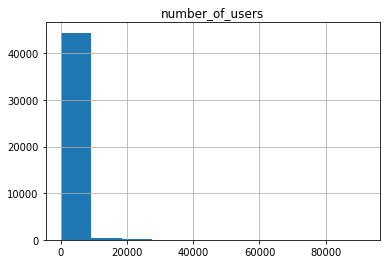

In [ ]:
# histogram
movie_ratings_df.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


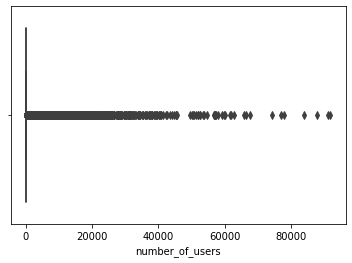

In [ ]:
# boxplot
sns.boxplot(movie_ratings_df.number_of_users)
plt.show()

#### 3.4.3.2 ratings by movies

In [ ]:
ratings.groupby('movieId')['rating'].median()

movieId
1         4.0
2         3.0
3         3.0
4         3.0
5         3.0
         ... 
176267    4.0
176269    3.5
176271    5.0
176273    1.0
176275    3.0
Name: rating, Length: 45115, dtype: float64

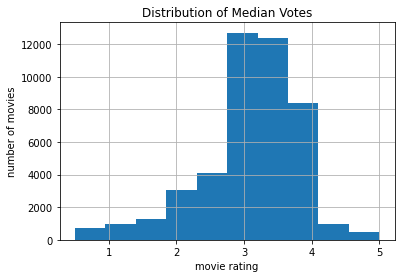

In [ ]:
# distribution of median votes per movie
ratings.groupby('movieId')['rating'].median().hist()
plt.xlabel('movie rating')
plt.ylabel('number of movies')
plt.title('Distribution of Median Votes')
plt.show()

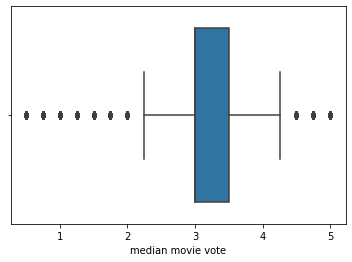

In [ ]:
sns.boxplot(x=ratings.groupby('movieId')['rating'].median())
plt.xlabel('median movie vote')
plt.show() 

### 3.4.4 Ratings Summary

There are 26,024,289 ratings that range between .5 and 5. The mean and median vote is 3.5, which suggests the data is symmetrical. There are 270,896 users with the median rating of 4 and mean vote of 3.7, which suggests the data is slightly left skewed, which is confirmed by the boxplot. There is one user who rated 18,276 movies while the mean and median number of movies rated is 92 and 30 movies, respectively. 

The boxplot of median ratings for each user shows 2,268 potential outliers on the left side of the distribution. If a user only rates a few movies, their limited ratings could cause the low median rating. However, after plotting vote count and median rating while coloring by potential outlier status, shows there vote count dose not explains the outliers. 

## 3.5 Keywords

### 3.5.1 Descriptive Statistics

In [ ]:
keywords.shape

(45432, 3)

In [ ]:
keywords.head(3)

,Unnamed: 0,id,keywords
0,0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


## 3.5 Links

In [ ]:
links.head(3)

,Unnamed: 0,movieId,imdbId,tmdbId
0,0,1,114709,862.0
1,1,2,113497,8844.0
2,2,3,113228,15602.0


## 3.6 Saving Data

In [ ]:
movies_metadata.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/movies_metadata_cleaned.csv')
ratings.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/ratings_cleaned.csv')
links.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/links_cleaned.csv')
keywords.to_csv('/content/drive/MyDrive/machine_learning_projects/movie_recommendation_system/data/keywords_cleaned.csv')